In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

# **Loading Data**

In [52]:
data = pd.read_csv("https://raw.githubusercontent.com/ramsha275/ML_Datasets/main/compresive_strength_concrete.csv")

In [53]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# **Shuffling Data**

In [54]:
data = data.sample(frac=1).reset_index(drop=True)
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,186.2,124.1,0.0,185.7,0.0,1083.4,764.3,7,8.00
1,310.0,0.0,0.0,192.0,0.0,970.0,850.0,7,14.99
2,233.8,0.0,94.6,197.9,4.6,947.0,852.2,100,34.56
3,393.0,0.0,0.0,192.0,0.0,940.6,785.6,3,19.20
4,349.0,0.0,0.0,192.0,0.0,1047.0,806.9,3,15.05
...,...,...,...,...,...,...,...,...,...
1025,202.0,11.0,141.0,206.0,1.7,942.0,801.0,7,15.07
1026,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,56,44.14
1027,133.1,210.2,0.0,195.7,3.1,949.4,795.3,28,28.94
1028,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30


# **Checking MIssing Values**

In [55]:
data.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

# **Standardized the Input Variables. Hint: Centeralized the data**

In [56]:
labels_mean = np.mean(data['Concrete compressive strength(MPa, megapascals) '])
labels_std = np.std(data['Concrete compressive strength(MPa, megapascals) '])
labels_mean

35.81796116504856

In [57]:
for col in data.columns:
  data[col] -= np.mean(data[col])
  data[col] /= np.std(data[col])


In [58]:
print(data.head())

   Cement (component 1)(kg in a m^3 mixture)  ...  Concrete compressive strength(MPa, megapascals) 
0                                  -0.909169  ...                                         -1.665983
1                                   0.276023  ...                                         -1.247360
2                                  -0.453474  ...                                         -0.075338
3                                   1.070619  ...                                         -0.995229
4                                   0.649387  ...                                         -1.243767

[5 rows x 9 columns]


# **Split into 70% Training(Samples,Labels) , 30% Test(Samples,Labels)** 

In [59]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,2.295683e-15,-8.542250e-17,6.682896e-18,1.146009e-15,-5.389432e-17,7.991504e-15,9.314556e-16,-9.620136e-17,-8.685609e-16
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715253e+00,-8.568879e-01,-8.471439e-01,-2.800211e+00,-1.039143e+00,-2.212138e+00,-2.240917e+00,-7.073594e-01,-2.005552e+00
25%,-8.500535e-01,-8.568879e-01,-8.471439e-01,-7.808939e-01,-1.039143e+00,-5.265174e-01,-5.319697e-01,-6.123314e-01,-7.251305e-01
50%,-7.915193e-02,-6.017783e-01,-8.471439e-01,1.608294e-01,3.271508e-02,-6.329352e-02,7.386739e-02,-2.797331e-01,-8.222491e-02
75%,6.589606e-01,8.007446e-01,1.002278e+00,4.887927e-01,6.691307e-01,7.267605e-01,6.291661e-01,1.637312e-01,6.178744e-01
max,2.477915e+00,3.310675e+00,2.281084e+00,3.065647e+00,4.353642e+00,2.214224e+00,2.733062e+00,5.057677e+00,2.801717e+00


In [60]:
labels = data.pop('Concrete compressive strength(MPa, megapascals) ')

In [61]:
data_len = len(data)
train_data = data.iloc[:data_len*70//100]
test_data = data.iloc[data_len*70//100:]

labels_len = len(labels)
train_labels = labels.iloc[:labels_len*70//100]
test_labels = labels.iloc[labels_len*70//100:]

# **Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).**

In [62]:
from tensorflow.keras import models
from tensorflow.keras import layers
def Train_Me_with_10_8_6_node(activation_function="relu"):
  network = models.Sequential()
  network.add(layers.Dense(10, activation=activation_function,input_shape=(train_data.shape[1],)))
  network.add(layers.Dense(8, activation=activation_function))
  network.add(layers.Dense(6, activation=activation_function))
  network.add(layers.Dense(1,activation=activation_function))
  network.compile(
      optimizer="rmsprop",
      loss="mse",
      metrics=['mae']
  )
  return network

In [63]:
from tensorflow.keras import models
from tensorflow.keras import layers
def Train_Me_with_10_8_6_node_without_act_func_output(activation_function="relu"):
  network = models.Sequential()
  network.add(layers.Dense(10, activation=activation_function,input_shape=(train_data.shape[1],)))
  network.add(layers.Dense(8, activation=activation_function))
  network.add(layers.Dense(6, activation=activation_function))
  network.add(layers.Dense(1))
  network.compile(
      optimizer="rmsprop",
      loss="mse",
      metrics=['mae']
  )
  return network

In [64]:
from tensorflow.keras import models
from tensorflow.keras import layers
def Train_Me_with_8_6_4_node(activation_function="relu"):
  network = models.Sequential()
  network.add(layers.Dense(8, activation=activation_function,input_shape=(train_data.shape[1],)))
  network.add(layers.Dense(6, activation=activation_function))
  network.add(layers.Dense(4, activation=activation_function))
  network.add(layers.Dense(1))
  network.compile(
      optimizer="rmsprop",
      loss="mse",
      metrics=['mae']
  )
  return network

In [65]:
from tensorflow.keras import models
from tensorflow.keras import layers
def Train_Me_with_8_6_4_node_without_act_func_output(activation_function="relu"):
  network = models.Sequential()
  network.add(layers.Dense(8, activation=activation_function,input_shape=(train_data.shape[1],)))
  network.add(layers.Dense(6, activation=activation_function))
  network.add(layers.Dense(4, activation=activation_function))
  network.add(layers.Dense(1))
  network.compile(
      optimizer="rmsprop",
      loss="mse",
      metrics=['mae']
  )
  return network

# **Training Model with activation function tanh with node 10 8 6 with tanh in output layer**

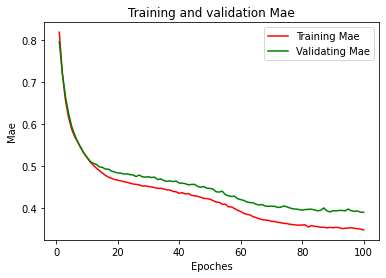

FOR MODEL1 Minimum Absolute Error = 0.3898472785949707 at index 99


In [66]:
Model_Results1 = Train_Me_with_10_8_6_node(activation_function="tanh").fit(
      train_data,train_labels,batch_size=32,epochs=100,validation_data=(test_data,test_labels),verbose=0
  )
history_dict = Model_Results1.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()
history_dict = Model_Results1.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
j = 0
for x,y in enumerate(val_acc_values):
  if maxi >= y:
    maxi = y
    j = x
print(f"FOR MODEL1 Minimum Absolute Error = {maxi} at index {j}")

# **Training Model with activation function relu with node 10 8 6 with relu in output layer**

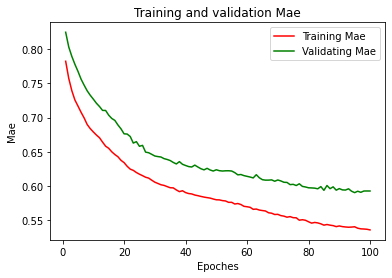

FOR MODEL1 Minimum Absolute Error = 0.5901369452476501 at index 94


In [67]:
Model_Results2 = Train_Me_with_10_8_6_node(activation_function="relu").fit(
      train_data,train_labels,batch_size=32,epochs=100,validation_data=(test_data,test_labels),verbose=0
  )
history_dict = Model_Results2.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()
history_dict = Model_Results2.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
j = 0
for x,y in enumerate(val_acc_values):
  if maxi >= y:
    maxi = y
    j = x
print(f"FOR MODEL1 Minimum Absolute Error = {maxi} at index {j}")

# **Training Model with activation function tanh with node 10 8 6 without tanh in output layer**

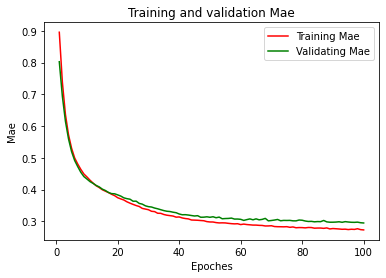

FOR MODEL1 Minimum Absolute Error = 0.2948044538497925 at index 99


In [68]:
Model_Results3 = Train_Me_with_10_8_6_node_without_act_func_output(activation_function="tanh").fit(
      train_data,train_labels,batch_size=32,epochs=100,validation_data=(test_data,test_labels),verbose=0
  )
history_dict = Model_Results3.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()
history_dict = Model_Results3.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
j = 0
for x,y in enumerate(val_acc_values):
  if maxi >= y:
    maxi = y
    j = x
print(f"FOR MODEL1 Minimum Absolute Error = {maxi} at index {j}")

# **Training Model with activation function relu with node 10 8 6 without relu in output layer**

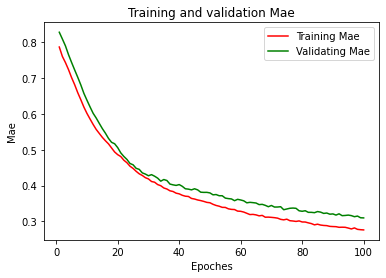

FOR MODEL1 Minimum Absolute Error = 0.3098066747188568 at index 99


In [69]:
Model_Results4 = Train_Me_with_10_8_6_node_without_act_func_output(activation_function="relu").fit(
      train_data,train_labels,batch_size=32,epochs=100,validation_data=(test_data,test_labels),verbose=0
  )
history_dict = Model_Results4.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()
history_dict = Model_Results4.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
j = 0
for x,y in enumerate(val_acc_values):
  if maxi >= y:
    maxi = y
    j = x
print(f"FOR MODEL1 Minimum Absolute Error = {maxi} at index {j}")

# **Training Model with activation function tanh with node 8 6 4 with tanh in output layer**

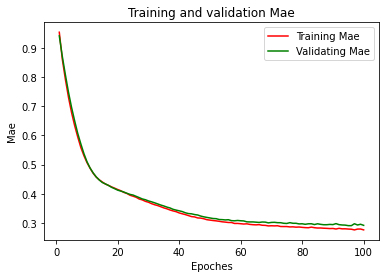

FOR MODEL1 Minimum Absolute Error = 0.2908425033092499 at index 95


In [70]:
Model_Results5 = Train_Me_with_8_6_4_node(activation_function="tanh").fit(
      train_data,train_labels,batch_size=32,epochs=100,validation_data=(test_data,test_labels),verbose=0
  )
history_dict = Model_Results5.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()
history_dict = Model_Results5.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
j = 0
for x,y in enumerate(val_acc_values):
  if maxi >= y:
    maxi = y
    j = x
print(f"FOR MODEL1 Minimum Absolute Error = {maxi} at index {j}")

# **Training Model with activation function relu with node 8 6 4 with relu in output layer**

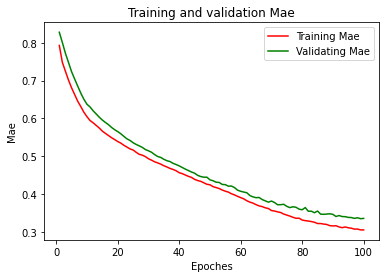

FOR MODEL1 Minimum Absolute Error = 0.33553725481033325 at index 98


In [71]:
Model_Results6 = Train_Me_with_8_6_4_node(activation_function="relu").fit(
      train_data,train_labels,batch_size=32,epochs=100,validation_data=(test_data,test_labels),verbose=0
  )
history_dict = Model_Results6.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()
history_dict = Model_Results6.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
j = 0
for x,y in enumerate(val_acc_values):
  if maxi >= y:
    maxi = y
    j = x
print(f"FOR MODEL1 Minimum Absolute Error = {maxi} at index {j}")

# **Training Model with activation function tanh with node 8 6 4 without tanh in output layer**

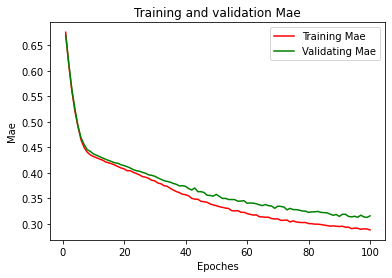

FOR MODEL1 Minimum Absolute Error = 0.31267452239990234 at index 98


In [72]:
Model_Results7 = Train_Me_with_8_6_4_node_without_act_func_output(activation_function="tanh").fit(
      train_data,train_labels,batch_size=32,epochs=100,validation_data=(test_data,test_labels),verbose=0
  )
history_dict = Model_Results7.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()
history_dict = Model_Results7.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
j = 0
for x,y in enumerate(val_acc_values):
  if maxi >= y:
    maxi = y
    j = x
print(f"FOR MODEL1 Minimum Absolute Error = {maxi} at index {j}")

# **Training Model with activation function relu with node 8 6 4 without relu in output layer**

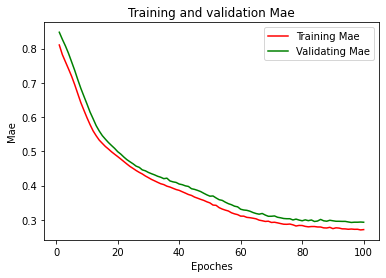

FOR MODEL1 Minimum Absolute Error = 0.29225239157676697 at index 95


In [73]:
Model_Results8 = Train_Me_with_8_6_4_node_without_act_func_output(activation_function="relu").fit(
      train_data,train_labels,batch_size=32,epochs=100,validation_data=(test_data,test_labels),verbose=0
  )
history_dict = Model_Results8.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()
history_dict = Model_Results8.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
j = 0
for x,y in enumerate(val_acc_values):
  if maxi >= y:
    maxi = y
    j = x
print(f"FOR MODEL1 Minimum Absolute Error = {maxi} at index {j}")

# **After all Experiments We conclude that Model with activation function tanh with node 8 6 4 and with tanh in output layer has mininum MAE value**

**Now Removing OverFitting**

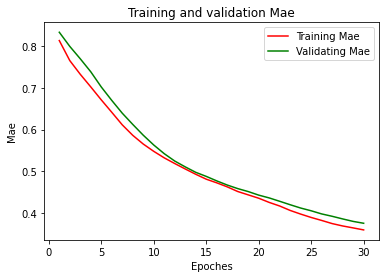

FOR MODEL1 Minimum Absolute Error = 0.3758995831012726 at index 29


In [74]:
Model_OPT_Results = Train_Me_with_8_6_4_node(activation_function="tanh").fit(
      train_data,train_labels,batch_size=32,epochs=30,validation_data=(test_data,test_labels),verbose=0
  )
history_dict = Model_OPT_Results.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()
history_dict = Model_OPT_Results.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
j = 0
for x,y in enumerate(val_acc_values):
  if maxi >= y:
    maxi = y
    j = x
print(f"FOR MODEL1 Minimum Absolute Error = {maxi} at index {j}")

# **Using K_fold technique**

In [81]:
k =  5
num_val_samples = len(train_data) // k
num_epochs = 30
all_scores_relu = []
model = Train_Me_with_8_6_4_node(activation_function="tanh")

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  Final_Model = model.fit(partial_train_data, partial_train_targets,epochs = num_epochs, batch_size=1,verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_relu.append(val_mae)
  history_dict = Final_Model.history
  mae_values = history_dict['mae']
print(f"On Eveluation Average using RELU and having {num_epochs} epoches is {np.average(all_scores_relu)}")

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
On Eveluation Average using RELU and having 30 epoches is 0.2868521809577942


# **Predictions show**

In [82]:
Predicted_val = model.predict(test_data)

In [83]:
test_labels = np.array(test_labels)

In [84]:
def Predit(m=4):
  print(f" the Actual value Price was : {test_labels[m]*labels_std+labels_mean} \n the Predicted value Price was : {Predicted_val[m]*labels_std+labels_mean} ")


In [85]:
y_true = test_labels
y_pred = Predicted_val.flatten()

(0.0, 1.0)

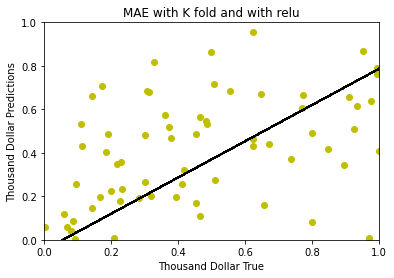

In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
coef = np.polyfit(y_true,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.figure()
plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.title('MAE with K fold and with relu')
plt.xlabel('Thousand Dollar True' )
plt.ylabel('Thousand Dollar Predictions' )
plt.xlim(0, 1)
plt.ylim(0, 1)